# ML-QuIC Demonstration Notebook

This notebook runs through the process for training and testing the models evaluated in the AI-QuIC study.

## Universal Import of Data and Packages

In [1]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [19]:
### Import Data and Create Objects to Analyze
DATA_DIR = '../Data/BigAnalysis'
RANDOM_SEED = 7

# Load data
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);
ml_quic.get_dataset_statistics()

Loading Data from ../Data/BigAnalysis
---- Dataset Label Distribution ----
Negative Samples: 4155
False Positive Samples: 93
Positive Samples: 916

---- Well Content Distribution: ----
Data Wells: 4180
Control Wells: 984


[4155, 93, 916, 984, 4180]

## Unsupervised - Raw Data
### KMeans

In [3]:
## Add KMeans to the list of models to test
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3), model_name='KMeans', data_type='raw', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['KMeans'], train_type=3)

[{'KMeans': array([ 286, 1630, 1367, ...,   82, 3650, 1993])},
 {'KMeans': array([2197, 3211,  817, ..., 3650, 4565, 1256])}]

### Spectral Clustering

In [4]:
### Add Spectral Clustering
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral', data_type='raw', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['Spectral'], train_type=3)

[{'KMeans': array([ 286, 1630, 1367, ...,   82, 3650, 1993]),
  'Spectral': array([1256, 2760,  924, ..., 4991, 4339, 4865])},
 {'KMeans': array([2197, 3211,  817, ..., 3650, 4565, 1256]),
  'Spectral': array([1678,  841,  184, ..., 2503, 3891, 1936])}]

### Train and Compare Unsupervised Models

c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=21.
  warnings.warn(


KMeans:
              precision    recall  f1-score   support

         neg       0.84      1.00      0.91      4248
         pos       0.91      0.10      0.18       916

    accuracy                           0.84      5164
   macro avg       0.87      0.55      0.54      5164
weighted avg       0.85      0.84      0.78      5164



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral:
              precision    recall  f1-score   support

         neg       1.00      0.85      0.92      4248
         pos       0.59      0.99      0.74       916

    accuracy                           0.88      5164
   macro avg       0.80      0.92      0.83      5164
weighted avg       0.93      0.88      0.89      5164

-------- Results on False Positives for KMeans --------
Accuracy on False Positives: 0.9032258064516129
False Positives Account for 1.08% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 9.833333333333334
Average RAF: 0.11568882255555556
Average MPR: 15.511711102222222
Average MS: 2046.9722222222222
Correctly Classified FP Characteristics:
Average Time to Threshold: 33.116904761904756
Average RAF: 0.03421607670238096
Average MPR: 10.083232150821427
Average MS: 717.0982142857143


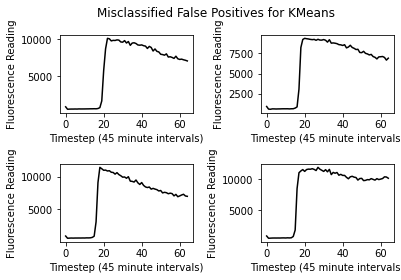

-------- Results on False Positives for Spectral --------


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Accuracy on False Positives: 0.1827956989247312
False Positives Account for 4.85% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 28.34302631578947
Average RAF: 0.04580559231578948
Average MPR: 12.244631720263158
Average MS: 1001.4111842105264
Correctly Classified FP Characteristics:
Average Time to Threshold: 42.13235294117647
Average RAF: 0.025536754705882354
Average MPR: 3.2944052852352943
Average MS: 150.10294117647058


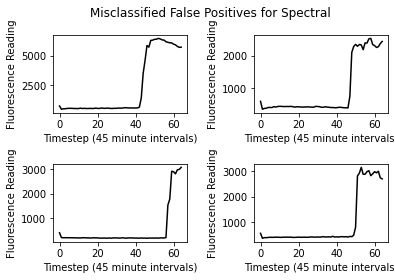

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 5.25, Average: 21.659421397379912, Max: 47.25
RAF:
	Min: 0.021164021, Average: 0.05270747417248909, Max: 0.19047619
MPR:
	Min: 1.607758621, Average: 11.000895917631004, Max: 54.12040816
MS:
	Min: 48.75, Average: 850.3212336244542, Max: 5967.75


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


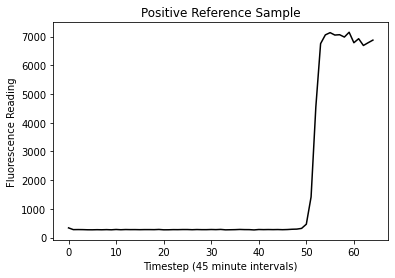

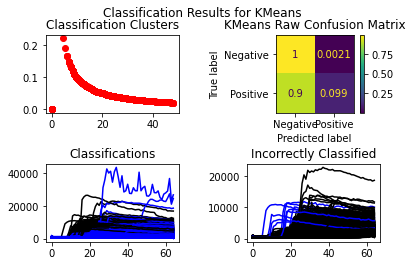

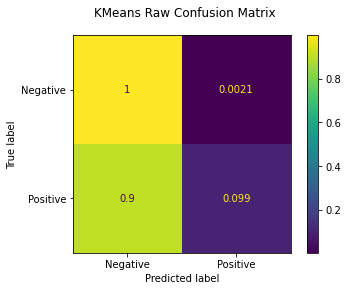

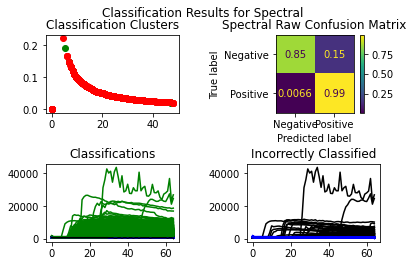

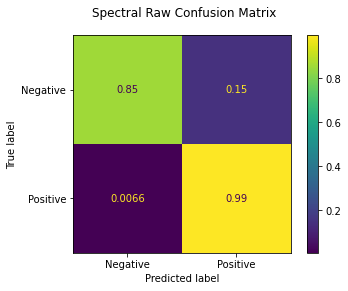

In [5]:
### Get Unsupervised Scores and Plots
ml_quic.train_models(tags=['Unsupervised'])
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

## Supervised - Raw Data

### Multilayer Perceptron

In [6]:
## MLP
from Models import MLP
imp.reload(MLP)

# Add MLP to list of supervised models
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), file_path='../SavedModels/Raw/'), model_name = 'MLP', data_type = 'raw', tag='Supervised')

### Support Vector Machine

In [7]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(file_path='../SavedModels/Raw/'), model_name = 'SVM', data_type = 'raw', tag = 'Supervised')

### Train and Compare Supervised Models

In [8]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

17/17 [==============================] - 1s 849us/step
MLP:
              precision    recall  f1-score   support

         neg       1.00      0.98      0.99       422
         pos       0.90      1.00      0.95        94

    accuracy                           0.98       516
   macro avg       0.95      0.99      0.97       516
weighted avg       0.98      0.98      0.98       516

SVM:
              precision    recall  f1-score   support

         neg       1.00      0.98      0.99       422
         pos       0.91      1.00      0.95        94

    accuracy                           0.98       516
   macro avg       0.96      0.99      0.97       516
weighted avg       0.98      0.98      0.98       516

-------- Results on False Positives for MLP --------
17/17 [==============================] - 0s 845us/step
Accuracy on False Positives: 0.0
False Positives Account for 100.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 31.575
Average

c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


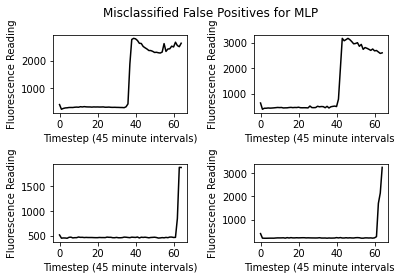

-------- Results on False Positives for SVM --------
Accuracy on False Positives: 0.2
False Positives Account for 88.89% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 31.78125
Average RAF: 0.035331155125
Average MPR: 12.725930132375
Average MS: 687.0625
Correctly Classified FP Characteristics:
Average Time to Threshold: 30.75
Average RAF: 0.0440860215
Average MPR: 4.0498183095
Average MS: 236.625


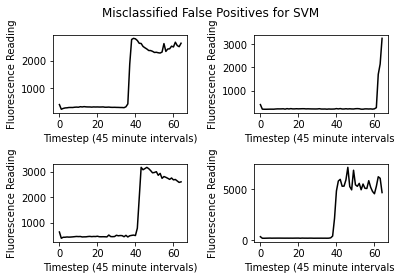

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 5.25, Average: 21.659421397379912, Max: 47.25
RAF:
	Min: 0.021164021, Average: 0.05270747417248909, Max: 0.19047619
MPR:
	Min: 1.607758621, Average: 11.000895917631004, Max: 54.12040816
MS:
	Min: 48.75, Average: 850.3212336244542, Max: 5967.75
17/17 [==============================] - 0s 939us/step


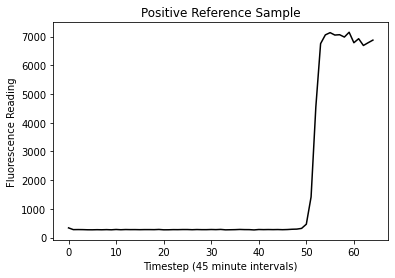

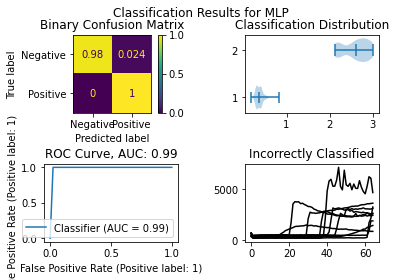

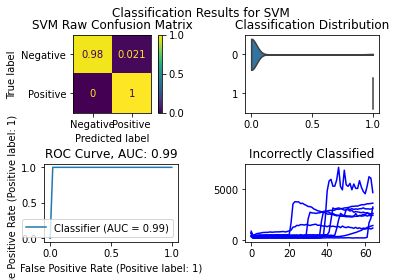

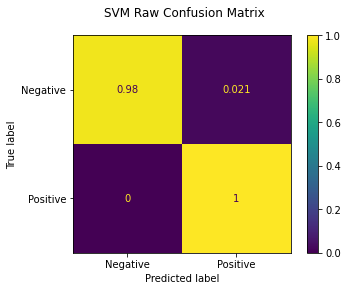

In [9]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])

## Feature Threshold Analysis
### Selecting Most Important Time Steps

Text(0.5, 0, 'Timestep')

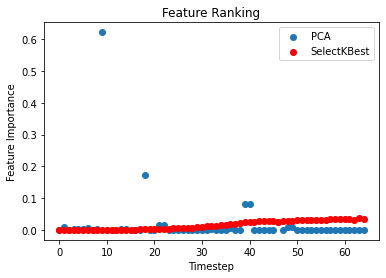

In [10]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x = StandardScaler().fit_transform(ml_quic.get_numpy_dataset('raw'))
y = ml_quic.get_numpy_dataset('labels')

pca = PCA().fit(x)
skb = SelectKBest(k = 'all').fit(x, y)

most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
features = pca.explained_variance_ratio_[most_important]

plt.scatter(np.arange(len(features)), features)
plt.scatter(np.arange(len(features)), skb.scores_ / (np.sum(skb.scores_)), c='r')
plt.legend(['PCA', 'SelectKBest'])
plt.title('Feature Ranking')
plt.ylabel('Feature Importance')
plt.xlabel('Timestep')

## Unsupervised - Analysis

### Create New Object

In [11]:
raw_ml_quic = copy.copy(ml_quic)
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


### Add KMeans Model

In [12]:
### Add KMeans to the list of models to test
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3), model_name='KMeans', data_type='analysis', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['KMeans'], train_type=3)

[{'KMeans': array([3955, 4934, 4112, ..., 3794, 2749, 2891])},
 {'KMeans': array([4472, 3914, 4175, ..., 2060, 4107, 1000])}]

### Add Spectral Clustering

In [13]:
### Add Spectral Clustering
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral', data_type='analysis', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['Spectral'], train_type=3)

[{'KMeans': array([3955, 4934, 4112, ..., 3794, 2749, 2891]),
  'Spectral': array([2926, 1662, 4219, ...,  272, 4040,  159])},
 {'KMeans': array([4472, 3914, 4175, ..., 2060, 4107, 1000]),
  'Spectral': array([  75, 1394, 4625, ..., 4563, 1878, 2930])}]

### Train and Compare Unsupervised Models

c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=21.
  warnings.warn(
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KMeans:
              precision    recall  f1-score   support

         neg       0.97      0.98      0.97      4248
         pos       0.90      0.84      0.87       916

    accuracy                           0.96      5164
   macro avg       0.93      0.91      0.92      5164
weighted avg       0.95      0.96      0.95      5164

Spectral:
              precision    recall  f1-score   support

         neg       1.00      0.66      0.79      4248
         pos       0.38      1.00      0.56       916

    accuracy                           0.72      5164
   macro avg       0.69      0.83      0.67      5164
weighted avg       0.89      0.72      0.75      5164

-------- Results on False Positives for KMeans --------
Accuracy on False Positives: 0.11827956989247312
False Positives Account for 35.65% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 33.58621951219512
Average RAF: 0.0330451951097561
Average MPR: 9.08946643814634
Average MS: 604.82

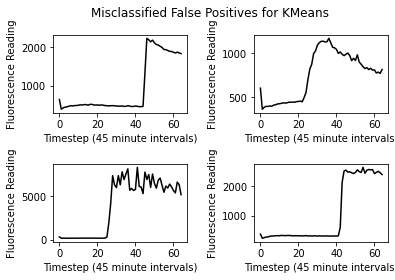

-------- Results on False Positives for Spectral --------


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Accuracy on False Positives: 1.0
False Positives Account for 0.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: nan
Average RAF: nan
Average MPR: nan
Average MS: nan
Correctly Classified FP Characteristics:
Average Time to Threshold: 30.86365591397849
Average RAF: 0.04210053597849462
Average MPR: 10.608568823537633
Average MS: 845.7956989247311
Insufficient missed false positives to plot
-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 5.25, Average: 21.659421397379912, Max: 47.25
RAF:
	Min: 0.021164021, Average: 0.05270747417248909, Max: 0.19047619
MPR:
	Min: 1.607758621, Average: 11.000895917631004, Max: 54.12040816
MS:
	Min: 48.75, Average: 850.3212336244542, Max: 5967.75


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


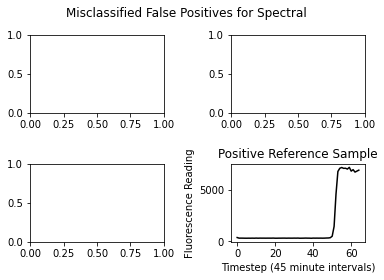

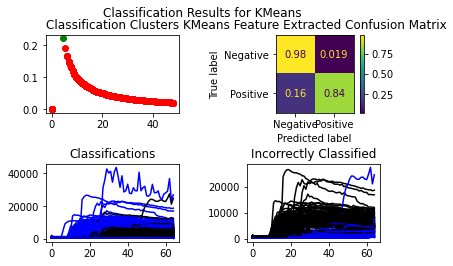

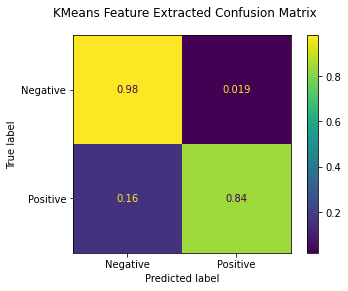

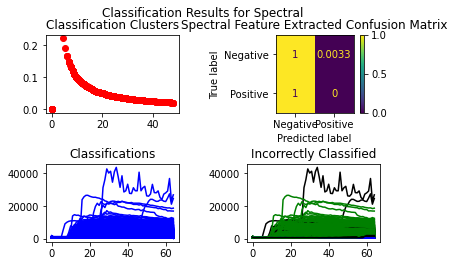

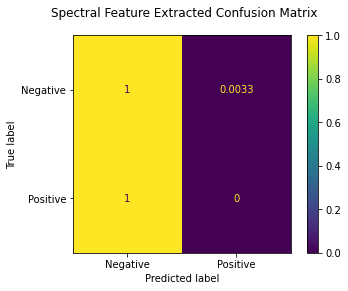

In [14]:
### Get Unsupervised Scores and Plots
ml_quic.train_models(tags=['Unsupervised'])
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

### Add Supervised Learning Technique (SVM)

In [15]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(), model_name = 'SVM', data_type = 'analysis', tag = 'Supervised')

In [16]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

SVM:
              precision    recall  f1-score   support

         neg       1.00      0.98      0.99       438
         pos       0.91      1.00      0.95        78

    accuracy                           0.98       516
   macro avg       0.95      0.99      0.97       516
weighted avg       0.99      0.98      0.98       516

-------- Results on False Positives for SVM --------
Accuracy on False Positives: 0.2727272727272727
False Positives Account for 100.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 25.96875
Average RAF: 0.043747273875000006
Average MPR: 6.990656766499999
Average MS: 622.25
Correctly Classified FP Characteristics:
Average Time to Threshold: 47.0
Average RAF: 0.021296296000000003
Average MPR: 4.888475270000001
Average MS: 105.08333333333333


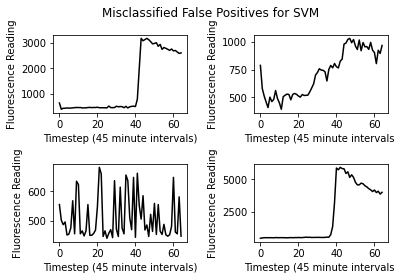

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 5.25, Average: 21.659421397379912, Max: 47.25
RAF:
	Min: 0.021164021, Average: 0.05270747417248909, Max: 0.19047619
MPR:
	Min: 1.607758621, Average: 11.000895917631004, Max: 54.12040816
MS:
	Min: 48.75, Average: 850.3212336244542, Max: 5967.75


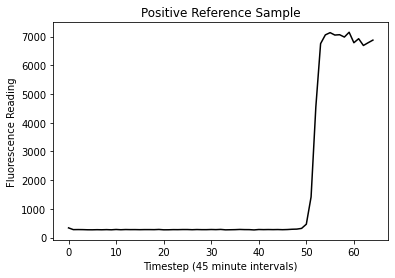

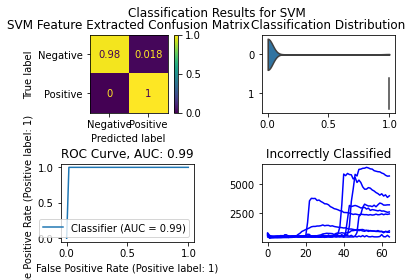

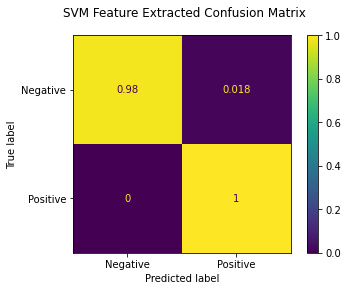

In [17]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])

In [18]:
# import pickle
# with open('../svm.pkl', 'wb') as f:
#     pickle.dump(ml_quic.models['SVM'].model, f)

# ml_quic.models['MLP'].model.save('../MLP2.keras')
# ml_quic.models['MLP'].model.save('../MLP2.h5')